# Adult Data Set Prediction

###### Implementing K-Nearest-Neighbors in the Adult Data Set, in order to predict whether a person makes more or less than US$50k a year.

Importing libraries used in this trial:

In [83]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as plt

Importing data from UCI and labeling the headers:

In [84]:
adult_data = pd.read_csv("train_data.csv", sep=r'\s*,\s*', engine='python', na_values="?")

adult_test = pd.read_csv("test_data.csv", sep=r'\s*,\s*', engine='python', na_values="?")

Checking out the data formatting:

In [85]:
adult_data.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


Following, some experimentation with the data set, plotting graphs and analyzing values:

In [86]:
adult_data.shape

(32560, 16)

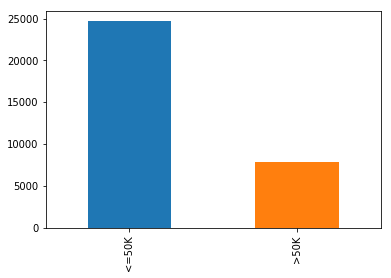

In [87]:
adult_data.income.value_counts().plot(kind="bar")

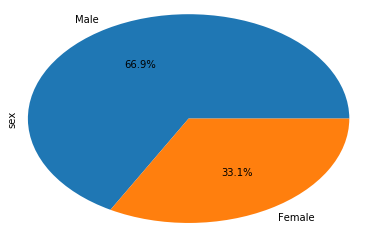

In [88]:
adult_data["sex"].value_counts().plot(kind="pie", radius=1.2, autopct='%1.1f%%')

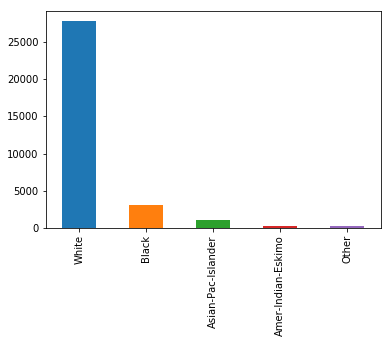

In [89]:
adult_data.race.value_counts().plot(kind="bar")

In [90]:
adult_data["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Now, the data needs some sharpening.

It is necessary to remove from the data all the unknown values:

In [91]:
adult_data_aux = adult_data.dropna()

In [92]:
adult_data_ = adult_data_aux[["age", "workclass", "fnlwgt", "education", "education.num", "marital.status", 
                                      "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", 
                                      "hours.per.week", "native.country", "income"]]

In [93]:
adult_data_.shape

(30161, 15)

So, about 2400 elements were deleted from the data set due to having NaN values. Now, we have to deal with the testing data.

In [94]:
adult_test.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [95]:
adult_test.shape

(16280, 15)

In [96]:
adult_test_ = adult_test[["age", "workclass", "fnlwgt", "education", "education.num", "marital.status", 
                                      "occupation", "relationship", "race", "sex", "capital.gain", "capital.loss", 
                                      "hours.per.week", "native.country"]]

In [97]:
adult_test_.shape

(16280, 14)

As seen, the testing data is now manageable. We can, finally, begin to work with the kNN application.

We will begin by selecting only a few of the values - the numeric ones - for prediction purposes.

In [119]:
Xadult = adult_data_[["age","education.num","capital.gain","capital.loss","hours.per.week"]]
Yadult = adult_data_.income
XtestAdult = adult_test_[["age","education.num","capital.gain","capital.loss","hours.per.week"]]

Then, we import the kNN method from SciKit Learn, as well as the cross validation algorithm.

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

We will test the 30 nearest neighbors.

In [133]:
knn = KNeighborsClassifier(n_neighbors=30)
scores = cross_val_score(knn, Xadult, Yadult, cv=10)

In [134]:
scores

array([0.83128936, 0.82035134, 0.83592973, 0.82493369, 0.82990716,
       0.84151194, 0.81896552, 0.83156499, 0.83217247, 0.8371476 ])

In [135]:
scores.mean()

0.8303773789665826

In [136]:
knn.fit(Xadult,Yadult)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [137]:
YtestPred = knn.predict(XtestAdult)

In [138]:
YtestPred.shape

(16280,)

In [141]:
predict = pd.DataFrame(adult_test.Id)
predict["income"] = YtestPred
predict

,Id,income
0,0,<=50K
1,1,<=50K
2,2,<=50K
3,3,<=50K
4,4,>50K
5,5,<=50K
6,6,>50K
7,7,>50K
8,8,<=50K
9,9,<=50K


In [142]:
predict.to_csv("prediction.csv", index=False)